<h1><b> Dimensionality Reduction - Principal Component Analysis </b></h1>

Importing required packages.

In [1]:
import numpy as np  #for matrix calculation
import matplotlib.pyplot as plt #for scatter plot
import pandas as pd #for data frame

Storing file paths of each file in a separate variable.

In [2]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

## 1. Implementing and explaining PCA method step by step on one file.

#### Reading the file - pca_a.txt

In [3]:
df = pd.read_csv(file_name, sep=',',header=None)
df.head(n=10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### Storing the disease labels in Y_label dataframe

We will separate the labels given in the last column, for easy calculations on the data frame.
Extracting the last column of the disease label from the df_a and storing it into Y_label data frame for further use.
Displaying first 10 rows of Y_label data frame

In [4]:
class_label = pd.DataFrame(df.iloc[:,-1])
class_label.columns = ['label']
class_label.head(n=10)

,label
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
6,Iris-setosa
7,Iris-setosa
8,Iris-setosa
9,Iris-setosa


After deleting the last column of the data frame, we will have data frame of only features of data as df_a.

In [5]:
df = df.iloc[:, :-1]
df.head(n=10)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


#### Mean Normalization on Data

In [6]:
df = df.sub(df.mean(axis=0), axis=1)

#### Converting dataframe to matrix

To perform mathematical operations, we will convert our features data frame into matrix form.

In [7]:
df_mat = np.asmatrix(df)
df_mat

matrix([[ -7.43333333e-01,   4.46000000e-01,  -2.35866667e+00,
          -9.98666667e-01],
        [ -9.43333333e-01,  -5.40000000e-02,  -2.35866667e+00,
          -9.98666667e-01],
        [ -1.14333333e+00,   1.46000000e-01,  -2.45866667e+00,
          -9.98666667e-01],
        [ -1.24333333e+00,   4.60000000e-02,  -2.25866667e+00,
          -9.98666667e-01],
        [ -8.43333333e-01,   5.46000000e-01,  -2.35866667e+00,
          -9.98666667e-01],
        [ -4.43333333e-01,   8.46000000e-01,  -2.05866667e+00,
          -7.98666667e-01],
        [ -1.24333333e+00,   3.46000000e-01,  -2.35866667e+00,
          -8.98666667e-01],
        [ -8.43333333e-01,   3.46000000e-01,  -2.25866667e+00,
          -9.98666667e-01],
        [ -1.44333333e+00,  -1.54000000e-01,  -2.35866667e+00,
          -9.98666667e-01],
        [ -9.43333333e-01,   4.60000000e-02,  -2.25866667e+00,
          -1.09866667e+00],
        [ -4.43333333e-01,   6.46000000e-01,  -2.25866667e+00,
          -9.98666667e-01],

#### Calculating covariance 

Now to achieve PCA on the dataset, lets start by calculating covariance matrix of the feature matrix. We will denote covariance matrix as sigma.

$S = (1/n) * XX^T$

In [8]:
# sigma = 1/df_a_mat.shape[0] * np.dot(df_a_mat.transpose(),df_a_mat)
sigma = np.cov(df_mat.T)
sigma

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [13]:
sigma.shape

(4, 4)

#### Calculating eigen values and eigen vectors

In [14]:
eigVals, eigVec = np.linalg.eig(sigma)

#### Sorting eigen values in decreasing order

In [15]:
sorted_index = eigVals.argsort()[::-1] 
eigVals = eigVals[sorted_index]
eigVec = eigVec[:,sorted_index]

In [16]:
eigVals

array([ 4.22484077,  0.24224357,  0.07852391,  0.02368303])

In [17]:
eigVec

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

### Selecting top k eigen vectors : k=2

In [18]:
eigVec = eigVec[:,:2]
eigVec

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

#### Transforming data on new subspace

In [19]:
eigVec = pd.DataFrame(np.real(eigVec))

In [20]:
transformed = df_mat.dot(eigVec)

In [21]:
transformed

matrix([[-2.68420713, -0.32660731],
        [-2.71539062,  0.16955685],
        [-2.88981954,  0.13734561],
        [-2.7464372 ,  0.31112432],
        [-2.72859298, -0.33392456],
        [-2.27989736, -0.74778271],
        [-2.82089068,  0.08210451],
        [-2.62648199, -0.17040535],
        [-2.88795857,  0.57079803],
        [-2.67384469,  0.1066917 ],
        [-2.50652679, -0.65193501],
        [-2.61314272, -0.02152063],
        [-2.78743398,  0.22774019],
        [-3.22520045,  0.50327991],
        [-2.64354322, -1.1861949 ],
        [-2.38386932, -1.34475434],
        [-2.6225262 , -0.81808967],
        [-2.64832273, -0.31913667],
        [-2.19907796, -0.87924409],
        [-2.58734619, -0.52047364],
        [-2.3105317 , -0.39786782],
        [-2.54323491, -0.44003175],
        [-3.21585769, -0.14161557],
        [-2.30312854, -0.10552268],
        [-2.35617109,  0.03120959],
        [-2.50791723,  0.13905634],
        [-2.469056  , -0.13788731],
        [-2.56239095, -0.374

In [22]:
final_df = np.hstack((transformed, class_label))
final_df = pd.DataFrame(final_df)
final_df.columns = ['x','y','label']

In [23]:
final_df

,x,y,label
0,-2.68421,-0.326607,Iris-setosa
1,-2.71539,0.169557,Iris-setosa
2,-2.88982,0.137346,Iris-setosa
3,-2.74644,0.311124,Iris-setosa
4,-2.72859,-0.333925,Iris-setosa
5,-2.2799,-0.747783,Iris-setosa
6,-2.82089,0.0821045,Iris-setosa
7,-2.62648,-0.170405,Iris-setosa
8,-2.88796,0.570798,Iris-setosa
9,-2.67384,0.106692,Iris-setosa


#### Scatter plot of new data set

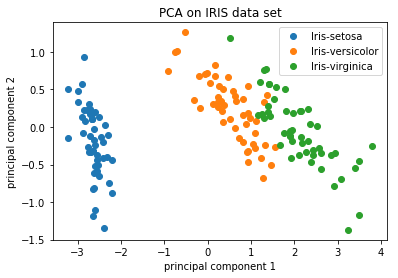

In [24]:
groups = final_df.groupby('label')
figure, axes = plt.subplots()
axes.margins(0.05)
for name, group in groups:
    axes.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
    axes.set_title("PCA on IRIS data set")
axes.legend()
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()